# 作業

- 作業目標 : iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)

In [9]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

### 載入 相關套件 並 執行 kmean 實驗 ...

- 實驗測試不同的群數
- 實驗測試不同的初始值
- 呈現結果

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

%matplotlib inline

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
estimators = [('k_means_8', KMeans(n_clusters=8)),
              ('k_means_3', KMeans(n_clusters=3)),
              ('k_means_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

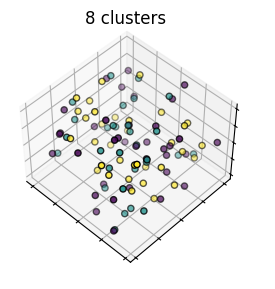

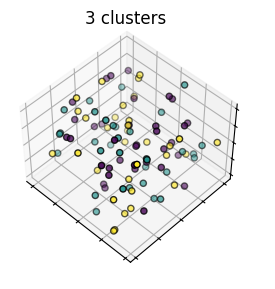

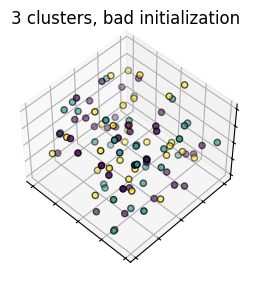

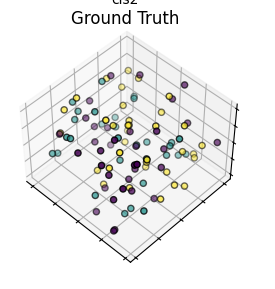

In [4]:
fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']

# Dummy data and estimators for example purposes
class DummyEstimator:
    def fit(self, X):
        self.labels_ = np.random.randint(0, 3, size=X.shape[0])

estimators = [('Estimator 1', DummyEstimator()), 
              ('Estimator 2', DummyEstimator()), 
              ('Estimator 3', DummyEstimator())]

# Dummy data
X = np.random.rand(100, 4)
y = np.random.randint(0, 3, size=100)

for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = fig.add_subplot(111, projection='3d', elev=48, azim=134)
    
    # Fit data
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float64), edgecolor='k')

    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum += 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = fig.add_subplot(111, projection='3d', elev=48, azim=134)

for name, label in [('cls0', 0), ('cls1', 1), ('cls2', 2)]:
    ax.text(X[y == label, 3].mean(),
            X[y == label, 0].mean(),
            X[y == label, 2].mean() + 2, name,
            horizontalalignment='center',
            bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))

# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float64)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12

plt.show()